# LAB 4 Group 5

Group NO 5 

1.   Siddhesh Dwarkanath Munagekar : W0747944
2.   Chaitanya Dutt M V : 0749773

1.  Prema Vikas Golla: 0746808

1.   Shashank Raj Menta : 0749155
2.   Trisha Manishbhai Patel: 0748716




In [759]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [760]:
data= pd.read_csv('/content/drive/MyDrive/Machine_learning_2/LAB4/vehicles_2013.csv')
data
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


In [761]:
print("50% of data",len(data)/2,"rows")

50% of data 581.0 rows


# Visualizing the dataset using Heat map and Highlighting the missing values

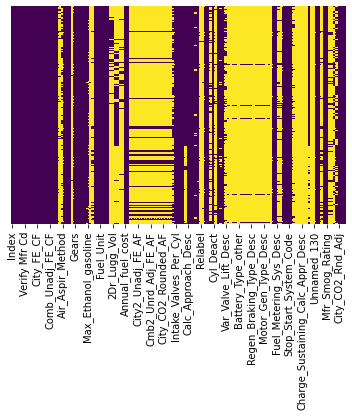

In [762]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')



Goal is to reduce the yellow colour which represents missing values

# Keeping a threshold of 50 % for missing values and dropping those columns whose total missing values are greater than the 50 %threshold

In [763]:
column_list= data.columns
data.isnull().sum()
len(column_list)
count =1
#Dropping the column which has more than 50 % of missing data
for i in column_list:
  total_null_val=data[i].isnull().sum()
  
  if total_null_val > len(data)/2:    
    data=data.drop(i,axis=1)
    print(count," Column droped & Total Null Values :  " , i ,  total_null_val)
    count +=1
    
print(" ")
print("Total Columns droped from dataset :",count -1)
#Comb Unadj FE - Conventional Fuel

1  Column droped & Total Null Values :   Guzzler 1081
2  Column droped & Total Null Values :   Air_Aspir_Method 801
3  Column droped & Total Null Values :   Trans_Other 1153
4  Column droped & Total Null Values :   Max_Biodiesel 1145
5  Column droped & Total Null Values :   Range1_Modeltype_Dr_range_CF 1003
6  Column droped & Total Null Values :   2Dr_Pass_Vol 965
7  Column droped & Total Null Values :   2Dr_Lugg_Vol 965
8  Column droped & Total Null Values :   4Dr_Pass_Vol 721
9  Column droped & Total Null Values :   4Dr_Lugg_Vol 721
10  Column droped & Total Null Values :   Htchbk_Pass_Vol 1055
11  Column droped & Total Null Values :   Htchbk_Lugg_Vol 1055
12  Column droped & Total Null Values :   City2_FE 1004
13  Column droped & Total Null Values :   Hwy_FE 1004
14  Column droped & Total Null Values :   Comb2_Fuel_FE 1004
15  Column droped & Total Null Values :   City2_Unadj_FE_AF 1004
16  Column droped & Total Null Values :   Hwy2_Unadj_FE_AF 1004
17  Column droped & Total Null Va

In [764]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Index                                         1162 non-null   int64  
 1   Model_Year                                    1162 non-null   int64  
 2   Mfr Name                                      1162 non-null   object 
 3   Division                                      1162 non-null   object 
 4   Carline                                       1162 non-null   object 
 5   Verify Mfr Cd                                 1162 non-null   object 
 6   Model_Index                                   1162 non-null   int64  
 7   Eng_Displ                                     1162 non-null   float64
 8   Cyl                                           1162 non-null   int64  
 9   Trans_type                                    1162 non-null   o

(1162, 68)

Excluding the Description as it is redundant since we have one more column with its shortform ,City and Hwy and MPG features as noted in LAB instruction needs to be removed

In [765]:
#Excluding Description Columns which are redundant
data=data.loc[:,~data.columns.str.endswith('Desc')]

#Excluding Columns which contains City
data=data.loc[:,~data.columns.str.contains('^city',case=False)]

#Excluding Columns which contains Highway
data=data.loc[:,~data.columns.str.contains('^Hwy',case=False)]

#Excluding Columns which contains MPG
data=data.loc[:,~data.columns.str.contains('MPG',case =False)]

data.shape

(1162, 50)

## Normalizing the  dataframe using the function which willconverting strings to lower case and replaceing blank and ?? with nan

In [766]:
#Normalize the strings in data frame ,converting strings to lower case and replaceing blank and ?? with nan

from pandas.api.types import is_string_dtype, is_object_dtype

def df_normalize_strings(data):
    for col in data.columns:
        if is_string_dtype(data[col]) or is_object_dtype(data[col]):
            data[col] = data[col].str.lower()
            data[col] = data[col].fillna(np.nan)
            data[col] = data[col].replace('', np.nan)
            data[col]=  data[col].replace('??',np.nan)
df_normalize_strings(data)

By doing normalization all the charaters are now in lower case and blanks ,?? are replaced by nan

In the below code ,

*   **Index** is droped as it was incrementing after each row which make no sense to keep in data as it will mislead,
   
*  **Model_Year** 2013 was observed to be repeated across the entire dataset so this column was discarded 

*    **Descriptor_model_type** Contained Comments so it was droped from analysis.





In [767]:
#Droping the columns as per above mnetioned reasons

data=data.drop(['Index' ,'Model_Year','Descriptor_model_type'],axis=1)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162 entries, 0 to 1161
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mfr Name                                      1162 non-null   object 
 1   Division                                      1162 non-null   object 
 2   Carline                                       1162 non-null   object 
 3   Verify Mfr Cd                                 1162 non-null   object 
 4   Model_Index                                   1162 non-null   int64  
 5   Eng_Displ                                     1162 non-null   float64
 6   Cyl                                           1162 non-null   int64  
 7   Trans_type                                    1162 non-null   object 
 8   Comb_FE_CF                                    1162 non-null   int64  
 9   Comb_Unadj_FE_CF                              1162 non-null   o

Seperating our Target Feature Comb Unadj FE from the list of predictors

mod values were observed in the Comb_Unadj_FE_CF feature ,which need to be converted to not a number (nan) values

In [768]:
#Replacing mod with nan
y=data[['Comb_Unadj_FE_CF']]
print(y[y['Comb_Unadj_FE_CF'].eq('mod')])
y['Comb_Unadj_FE_CF']= y['Comb_Unadj_FE_CF'].replace('mod',np.nan)


     Comb_Unadj_FE_CF
237               mod
238               mod
401               mod
402               mod
410               mod
411               mod
418               mod
422               mod
701               mod
743               mod
744               mod
1083              mod
1145              mod
1156              mod


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


Data type of y target was converted from string to float and Comb_Unadj_FE_CF was droped from predictor data 

In [769]:
#Converting  Y  feature data type to int

y=y.astype(float)

print("mean of Comb_Unadj_FE_CF ",np.mean(y['Comb_Unadj_FE_CF']))

###Dropping Comb_Unadj_FE_CF from data (X_features)
data=data.drop('Comb_Unadj_FE_CF',axis=1)

y['Comb_Unadj_FE_CF'].dtype

mean of Comb_Unadj_FE_CF  29.183907491289187


dtype('float64')

**Histogram** is plotted to understand the distribution of Comb_Unadj_FE_CF feature across the data.

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


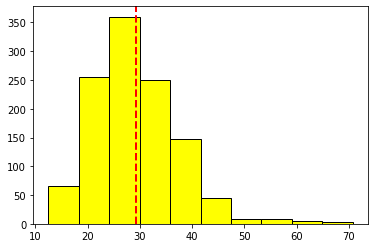

In [770]:
plt.hist(y['Comb_Unadj_FE_CF'],color='yellow', edgecolor='black')
plt.axvline(x=np.mean(y['Comb_Unadj_FE_CF']), color='r', linestyle='dashed', linewidth=2)

Since the histogram of target variable 'Comb_Unadj_FE_CF' is Normally ditributed with mean being the measure of central tendency.Hence we will replace nan values with  average **29.18**

In [771]:
#Replacing Nan values with mean of Comb_Unadj_FE_CF
print("Nan values before replacement",y['Comb_Unadj_FE_CF'].isnull().sum())

y['Comb_Unadj_FE_CF']=np.where(y['Comb_Unadj_FE_CF'].isna(), 29.18 ,y['Comb_Unadj_FE_CF'])

print("Nan values after replacement",y['Comb_Unadj_FE_CF'].isnull().sum())

Nan values before replacement 14
Nan values after replacement 0


## data_info Function
Creating a data_info function to have a quick over view on some of the important parameters of the features such as dtypes , percentage of missing values in the data , total number of unique values and unique values itself.

In [772]:
def data_info(data):
  with pd.option_context("display.max_colwidth",20):
    info=pd.DataFrame()
    
    info['data type']=data.dtypes
    info['precent missing']=data.isnull().sum()*100/len(data)
    info['No of Unique']=data.apply(lambda x:len(x.unique()))
    info['Unique Values']=data.apply(lambda x: x.unique())
    return info.sort_values('data type')


In [773]:
data_info(data)

,data type,precent missing,No of Unique,Unique Values
Intake_Valves_Per_Cyl,int64,0.000000,2,"[2, 1]"
EPA_FE_Label_Dataset_ID,int64,0.000000,1162,"[12953, 12952, 12955, 12954, 12113, 11033, 11092, 12492, 11743, 12493, 11087, 11125, 11123, 11249, 11642, 12646, 12647, 12648, 12649, 14037, 14038, 13185, 13137, 12441, 12234, 12128, 12442, 12130, 12466, 11899, 11900, 11901, 12257, 11982, 12578, 12034, 11952, 12035, 11974, 12593, 12747, 12748, 12592, 12083, 12084, 13118, 13117, 11190, 11199, 11711, 11202, 11746, 11747, 11744, 11745, 11056, 11756, 13119, 11842, 11757, 10660, 10306, 10661, 11678, 12457, 11381, 12458, 11383, 13446, 12956, 12650, 12546, 10142, 10470, 10143, 10468, 10775, 12888, 12874, 12707, 12681, 12683, 12680, 12682, 11191, 11198, 11716, 11201, 11748, 11749, 11752, 11753, 11760, 11761, 11762, 11763, 12530, 11336, 15192, 15190, ...]"
Carline_Class,int64,0.000000,22,"[1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 21, 30, 31, 32, 33]"
Exhaust_Valves_Per_Cyl,int64,0.000000,2,"[2, 1]"
Annual_fuel_cost,int64,0.000000,48,"[3550, 3800, 2200, 3000, 2700, 5700, 2950, 2800, 3350, 3150, 4050, 4400, 1450, 1550, 4750, 2500, 2300, 2400, 2850, 2600, 1600, 1900, 1850, 1800, 1950, 1700, 2050, 1650, 2650, 2150, 1500, 2100, 2550, 950, 1200, 1250, 1050, 2900, 1400, 1350, 1300, 3050, 3400, 3200, 4100, 3650, 4450, 4850]"
Gears,int64,0.000000,6,"[7, 6, 8, 5, 1, 4]"
Comb_FE_CF,int64,0.000000,35,"[16, 15, 26, 19, 21, 10, 18, 17, 14, 13, 37, 34, 12, 23, 25, 24, 20, 22, 36, 30, 31, 32, 29, 28, 33, 38, 27, 44, 42, 35, 50, 45, 40, 41, 11]"
Comb_CO2_Rnd_Adj,int64,0.000000,356,"[551, 581, 345, 341, 336, 458, 415, 847, 494, 457, 534, 497, 622, 612, 679, 669, 238, 261, 676, 742, 562, 634, 564, 626, 375, 356, 368, 448, 468, 539, 339, 343, 401, 592, 244, 295, 293, 287, 274, 310, 301, 309, 412, 429, 433, 443, 349, 374, 370, 395, 607, 588, 576, 569, 288, 260, 474, 508, 515, 490, 390, 402, 420, 384, 407, 389, 404, 397, 414, 417, 418, 424, 405, 399, 409, 406, 413, 464, 476, 471, 316, 358, 317, 360, 342, 377, 480, 486, 439, 432, 532, 646, 604, 633, 426, 385, 403, 446, 442, 461, ...]"
Cyl,int64,0.000000,8,"[8, 4, 6, 16, 12, 10, 3, 5]"
Model_Index,int64,0.000000,478,"[2, 1, 4, 3, 67, 428, 429, 436, 435, 438, 88, 146, 144, 197, 198, 142, 143, 145, 153, 154, 14, 13, 92, 93, 30, 32, 31, 33, 9, 7, 8, 222, 226, 228, 232, 233, 236, 238, 270, 273, 274, 271, 703, 702, 44, 45, 40, 41, 52, 53, 50, 51, 70, 71, 86, 72, 73, 56, 57, 58, 59, 202, 201, 221, 5, 149, 150, 191, 192, 123, 10, 6, 36, 37, 54, 55, 76, 77, 78, 79, 102, 101, 110, 109, 112, 111, 114, 113, 116, 115, 104, 103, 106, 105, 108, 107, 11, 22, 39, 38, ...]"


#Handeling EPA Column

There were 3 jargon comments in EPA column which were handeled by replacing it with 0 values and then the feture was converted into integer data type.

In [774]:
#Operation on EPA column


data['EPA ']=data['EPA '].replace('c 300 4matic is available as pzev and ffv version in my 2013. litmus test requires 3 cycle method for the pzev version while the ffv version can be labeled using derived 5 cycle method. mercedes has chosen not to use the 3-cycle method for both test groups. update 10/08/2014: relabel due to epa confirmatory testing (c/d).', 0)
data['EPA ']=data['EPA '].replace('update 10/08/2014: relabel due to epa confirmatory testing (c/d).',0)
print("Total number of null values",data['EPA '].isnull().sum())

data['EPA ']=data['EPA '].astype(int)
#data['EPA ']

Total number of null values 0


(array([  2.,   3.,  69., 309., 387., 230., 105.,  54.,   2.,   1.]),
 array([   0.,  570., 1140., 1710., 2280., 2850., 3420., 3990., 4560.,
        5130., 5700.]),
 <a list of 10 Patch objects>)

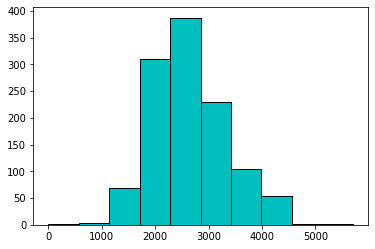

In [775]:
plt.hist(data['EPA '],edgecolor='black',color='c' )


Replacing two misssing values with 0 didnt affected the distribution of EPA feature histogram

In [776]:
#Handling the missing values
data.isnull().sum().sort_values(ascending=False)

Amount_spent_over_5yrs                          435
Car/Truck Category - Cash for Clunkers Bill.    400
Unique Label                                     81
Max_Ethanol_gasoline                             18
Label_Recalc                                     18
Comb_CO2_Rnd_Adj                                  0
Gears                                             0
Fuel_Unit                                         0
Fuel_Usage                                        0
Drive_Sys                                         0
Trans_Creeper_Gear                                0
Lockup_Torque_Converter                           0
Trans                                             0
Annual_fuel_cost                                  0
Air_Aspiration_Method                             0
Comb_Unrd_Adj_FE                                  0
Comb_FE_CF                                        0
Trans_type                                        0
Cyl                                               0
Eng_Displ   

Now lets target to fill missing values in top 5 features.

## Creating a for loop for creating a list of string features which has unique values less than 6 to find the relation ship.

In [777]:
#Considering string features having unique values less than 6
data=data.rename(columns={"Car/Truck Category - Cash for Clunkers Bill.":"Car_Truck_category"})

col_list=[]
for col in data.columns:
  if is_string_dtype(data[col]):
    if len(data[col].unique())<6:
      col_list.append(col)


In [778]:
col_list

['Air_Aspiration_Method',
 'Lockup_Torque_Converter',
 'Trans_Creeper_Gear',
 'Drive_Sys',
 'Fuel_Unit',
 'Gas_Guzzler_Exempt',
 'Car_Truck_category',
 'Unique Label',
 'Label_Recalc',
 'Suppressed',
 'Police_Emerg',
 'Cyl_Deact',
 'Var_Valve_Timing',
 'Var_Valve_Lift',
 'Fuel_Metering_sys',
 'Camless_Valvetrain',
 'Stop_Start_System_Code',
 'Stop_Start_System']

#Handeling Amount_spent_over_5yrs continuous feature

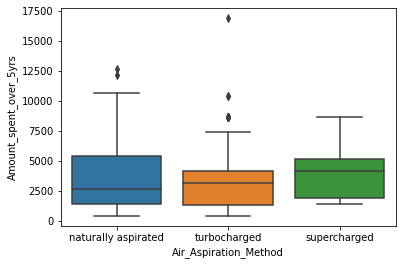

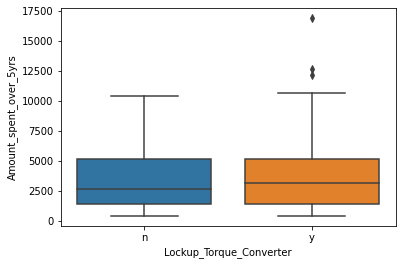

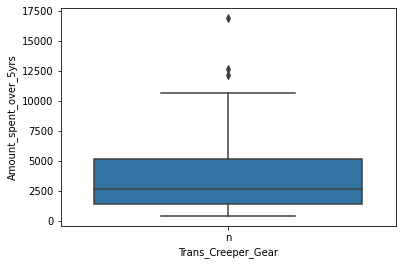

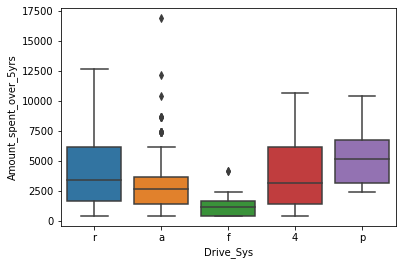

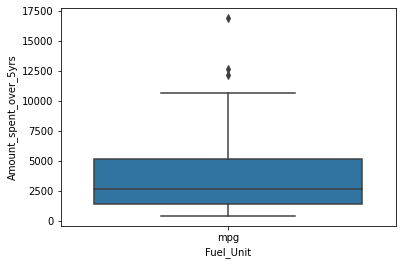

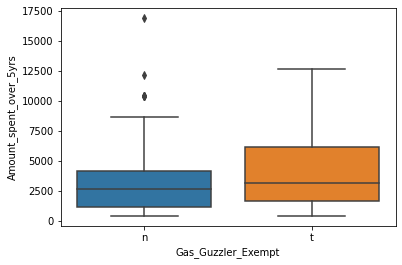

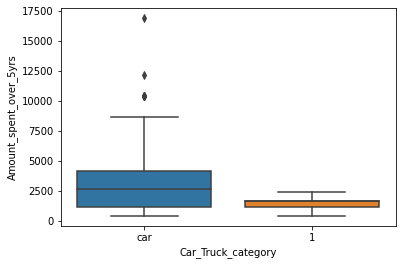

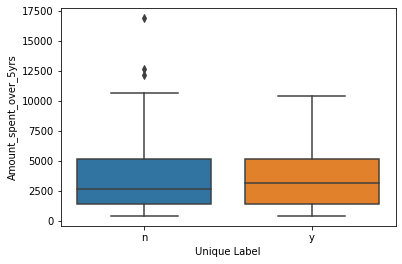

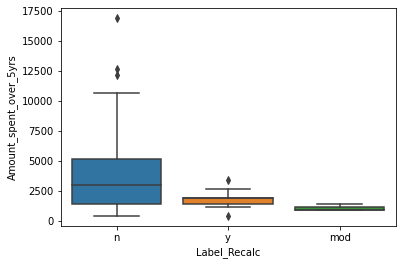

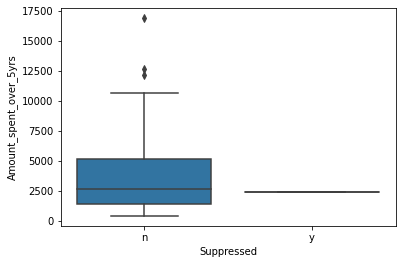

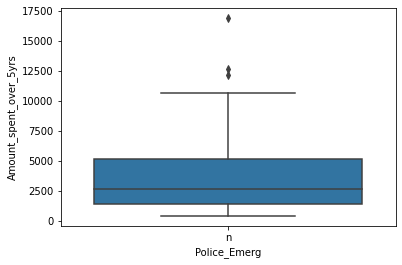

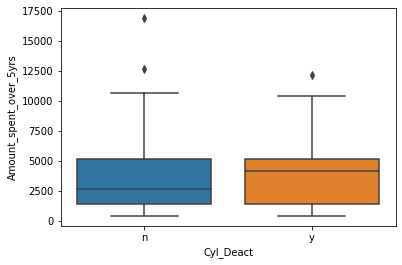

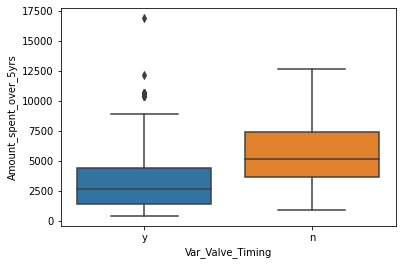

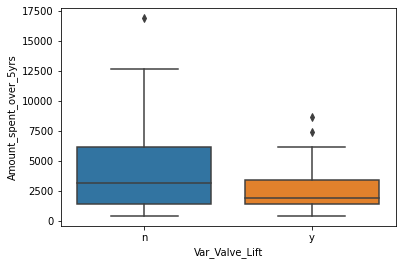

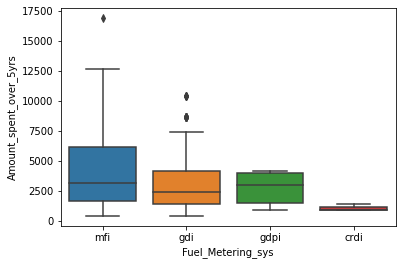

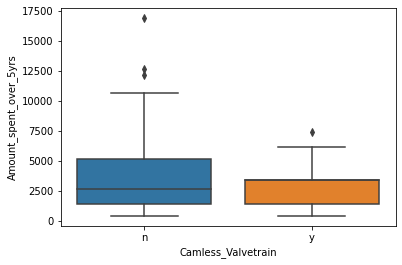

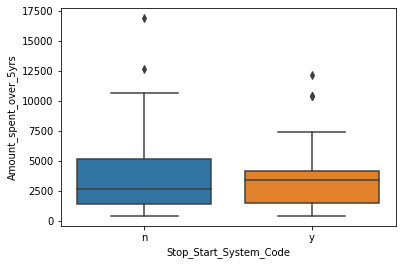

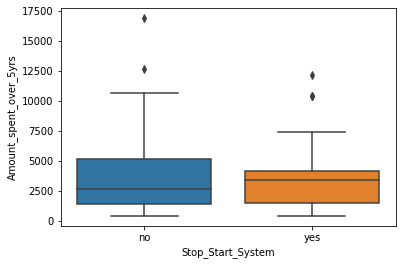

In [779]:
#Finding the relationship of Amount_spent_over_5yrs with multiple categorical features 
for i in col_list:
  plt.figure()
  sns.boxplot(x=i,y='Amount_spent_over_5yrs', data=data)
  

By comparing with multiple internal feature relationshio ,finally we are selecting Var_val_timing feature to predict missing values of Amount_spent_over_5yrs.....So when Var_val_timing is **y** Amount_spent_over_5yrs is **2500** and when Var_val_timing is **n** Amount_spent_over_5yrs is **5000**

In [780]:
def fill_amount_spent(cols):
  Amount_spent_over_5yrs=cols[0]    #first Column to be filled
  Var_Valve_Timing=cols[1]          #second Column for relationship
           
  if pd.isnull(Amount_spent_over_5yrs):

    if Var_Valve_Timing is 'n':
      return 5000
    else:
      return 2500
  else:
    return Amount_spent_over_5yrs


In [781]:
data['Amount_spent_over_5yrs']=data[['Amount_spent_over_5yrs','Var_Valve_Timing']].apply(fill_amount_spent,axis=1)
data['Amount_spent_over_5yrs'].isnull().sum()

0

# Handeling categorical feature Car_Truck_category

Converting Car_Truck_category dtype from string to category
In the below chunk {1: 'car',  -1: 'NaN',  0 : '1'} .Hence we will add 1 so that car =2, Nan =0, '1'= 1

In [782]:
data['Car_Truck_category']=data['Car_Truck_category'].astype('category').cat.as_ordered()
default_cat_code=data['Car_Truck_category'].cat.codes.unique()
print(default_cat_code)
data['Car_Truck_category'].unique()
data['Car_Truck_category']=data['Car_Truck_category'].cat.codes +1
data['Car_Truck_category'].unique()


[ 1 -1  0]


array([2, 0, 1], dtype=int8)

#Creating functions  to convert all the string columns into categories and then label encoding with with categorical codes.

In [783]:

from pandas.api.types import is_categorical_dtype, is_string_dtype

def df_string_to_cat(data):
    for col in data.columns:
        if is_string_dtype(data[col]):
            data[col] = data[col].astype('category').cat.as_ordered()

def df_cat_to_catcode(data):
    for col in data.columns:
        if is_categorical_dtype(data[col]):
            data[col] = data[col].cat.codes + 1

Visualizing the data agin for missing values

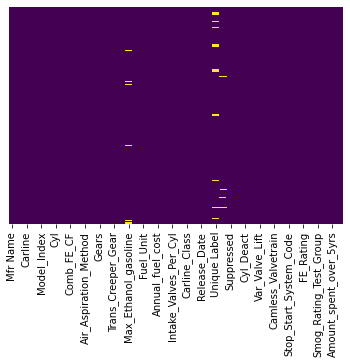

In [784]:
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# Handeling  string Unique Label  & string  Label_Recalc features

In [785]:
#Convering String to categorical features and encoding them with cat codes thus filling the remianing missing values
df_string_to_cat(data)
df_cat_to_catcode(data)

data.isnull().sum().sort_values(ascending=False)

Max_Ethanol_gasoline       18
Comb_CO2_Rnd_Adj            0
Trans                       0
Annual_fuel_cost            0
Gas_Guzzler_Exempt          0
Fuel_Unit                   0
Fuel_Usage                  0
Drive_Sys                   0
Trans_Creeper_Gear          0
Lockup_Torque_Converter     0
Gears                       0
Air_Aspiration_Method       0
Amount_spent_over_5yrs      0
Comb_Unrd_Adj_FE            0
Comb_FE_CF                  0
Trans_type                  0
Cyl                         0
Eng_Displ                   0
Model_Index                 0
Verify Mfr Cd               0
Carline                     0
Division                    0
EPA                         0
Intake_Valves_Per_Cyl       0
Exhaust_Valves_Per_Cyl      0
Carline_Class               0
Mfr_Smog_Rating             0
Smog_Rating_Test_Group      0
GHG_Rating                  0
FE_Rating                   0
Stop_Start_System           0
Stop_Start_System_Code      0
Oil_Viscosity               0
Camless_Va

# Handeling the numeric column Max_Ethanol_gasoline

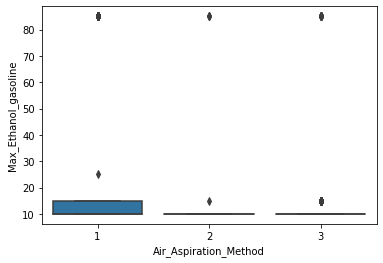

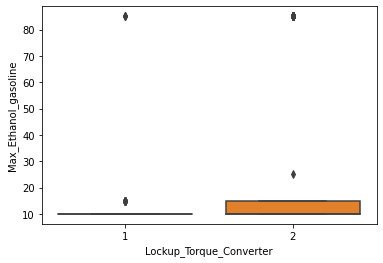

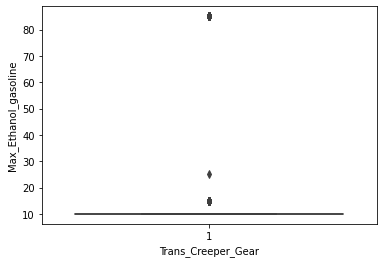

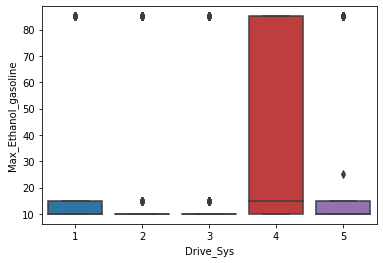

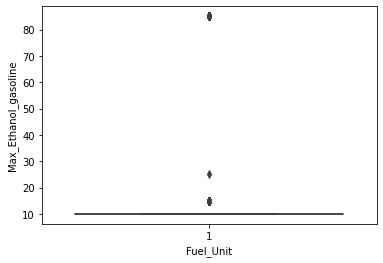

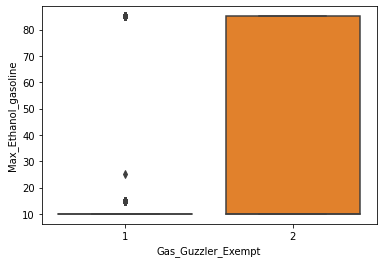

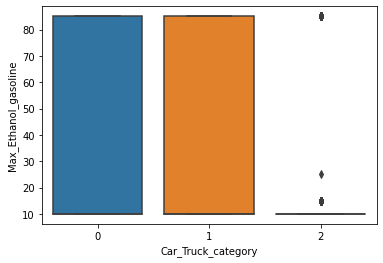

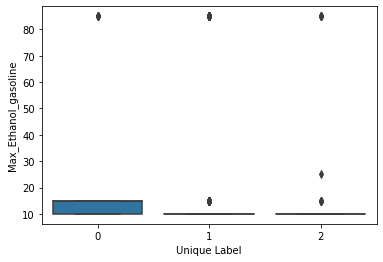

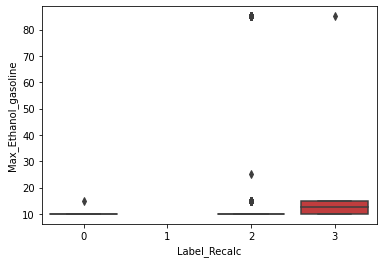

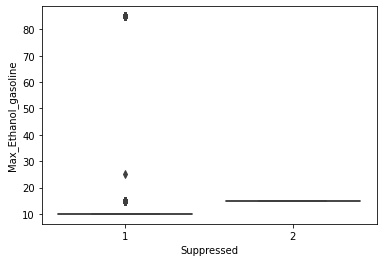

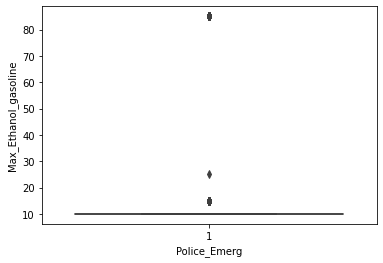

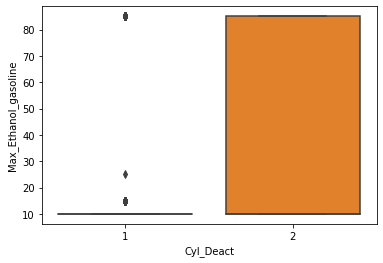

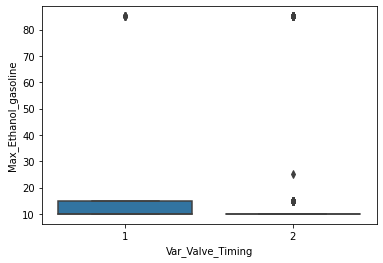

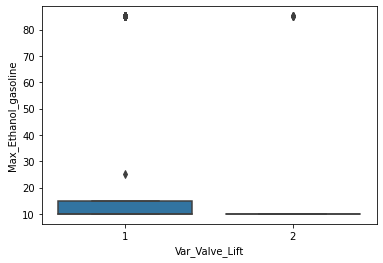

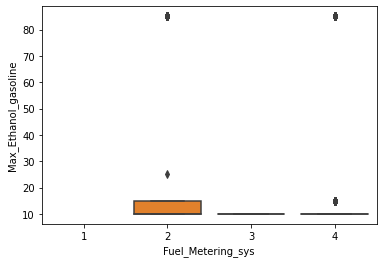

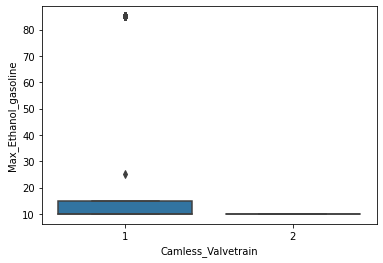

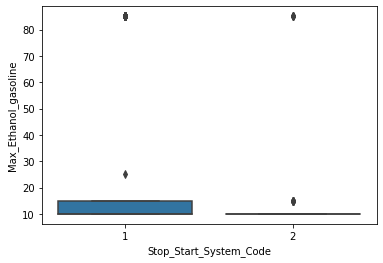

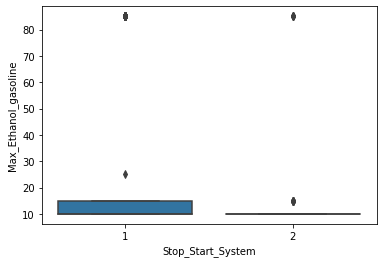

In [786]:
#Creating a for loop to analyse the relationship of differnt categorical features  with Max_ethanol_gasoline
for i in col_list:
  plt.figure()
  sns.boxplot(x=i,y='Max_Ethanol_gasoline', data=data)



##Considering Gas_Guzzler_Exempt as relationship for filling missing values
When Gas_Guzzler_Exempt is 1 then Max_Ethanol_gasoline is 10 and when Gas_Guzzler_Exempt is 2 Max_Ethanol_gasoline is 85

In [787]:
def fill_max_ethanol_gasoline(cols):
  Max_Ethanol_gasoline=cols[0]    #first Column to be filled
  Gas_Guzzler_Exempt=cols[1]          #second Column for relationship
           
  if pd.isnull(Max_Ethanol_gasoline):

    if Gas_Guzzler_Exempt == 2:
      return 85
    else:
      return 10
  else:
    return Max_Ethanol_gasoline

In [788]:
#Fills the missing values by calling above mentioned function
data['Max_Ethanol_gasoline']=data[['Max_Ethanol_gasoline','Gas_Guzzler_Exempt']].apply(fill_max_ethanol_gasoline , axis =1)

In [789]:
data.isnull().sum().sort_values(ascending =False)

Comb_CO2_Rnd_Adj           0
Trans                      0
Annual_fuel_cost           0
Gas_Guzzler_Exempt         0
Fuel_Unit                  0
Fuel_Usage                 0
Max_Ethanol_gasoline       0
Drive_Sys                  0
Trans_Creeper_Gear         0
Lockup_Torque_Converter    0
Gears                      0
Air_Aspiration_Method      0
Amount_spent_over_5yrs     0
Comb_Unrd_Adj_FE           0
Comb_FE_CF                 0
Trans_type                 0
Cyl                        0
Eng_Displ                  0
Model_Index                0
Verify Mfr Cd              0
Carline                    0
Division                   0
EPA                        0
Intake_Valves_Per_Cyl      0
Exhaust_Valves_Per_Cyl     0
Carline_Class              0
Mfr_Smog_Rating            0
Smog_Rating_Test_Group     0
GHG_Rating                 0
FE_Rating                  0
Stop_Start_System          0
Stop_Start_System_Code     0
Oil_Viscosity              0
Camless_Valvetrain         0
Fuel_Metering_

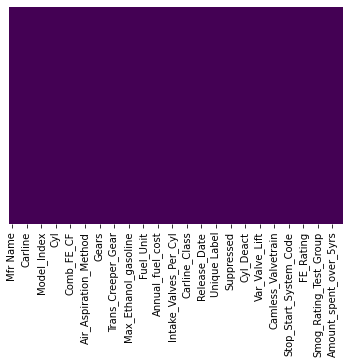

In [790]:
#Below Visualization suggest zero missing values
import seaborn as sns
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Preparing X_ feature (2 D array) and y_target (1 D array)ready to fit model.

In [791]:
X_features= data
y_target=y['Comb_Unadj_FE_CF']

print("Shape of X_feature ",X_features.shape)
print("Shape of y_target",y_target.shape)

Shape of X_feature  (1162, 46)
Shape of y_target (1162,)


# X_features 

In [792]:
#X_feature in Dataframe format
print(X_features.shape)
X_features

(1162, 46)


,Mfr Name,Division,Carline,Verify Mfr Cd,Model_Index,Eng_Displ,Cyl,Trans_type,Comb_FE_CF,Comb_Unrd_Adj_FE,Air_Aspiration_Method,Trans,Gears,Lockup_Torque_Converter,Trans_Creeper_Gear,Drive_Sys,Max_Ethanol_gasoline,Fuel_Usage,Fuel_Unit,Gas_Guzzler_Exempt,Annual_fuel_cost,EPA,Intake_Valves_Per_Cyl,Exhaust_Valves_Per_Cyl,Carline_Class,Car_Truck_category,Release_Date,EPA_FE_Label_Dataset_ID,Unique Label,Label_Recalc,Suppressed,Police_Emerg,Cyl_Deact,Var_Valve_Timing,Var_Valve_Lift,Fuel_Metering_sys,Camless_Valvetrain,Oil_Viscosity,Stop_Start_System_Code,Stop_Start_System,FE_Rating,GHG_Rating,Smog_Rating_Test_Group,Mfr_Smog_Rating,Amount_spent_over_5yrs,Comb_CO2_Rnd_Adj
0,1,2,636,2,2,4.7,8,10,16,16.0340,1,2,7,1,1,5,10.0,5,1,1,3550,3550,2,2,1,2,131,12953,1,2,1,1,1,2,1,4,1,14,1,1,4,4,15,2,6150.0,551
1,1,2,636,2,1,4.7,8,21,15,15.1973,1,5,6,1,1,5,10.0,5,1,1,3800,3800,2,2,1,2,131,12952,1,2,1,1,1,2,1,4,1,14,1,1,4,4,15,2,7400.0,581
2,1,2,637,2,4,4.7,8,10,16,16.0340,1,2,7,1,1,5,10.0,5,1,1,3550,3550,2,2,1,2,131,12955,1,2,1,1,1,2,1,4,1,14,1,1,4,4,15,2,6150.0,551
3,1,2,637,2,3,4.7,8,21,15,15.1973,1,5,6,1,1,5,10.0,5,1,1,3800,3800,2,2,1,2,131,12954,1,2,1,1,1,2,1,4,1,14,1,1,4,4,15,2,7400.0,581
4,2,3,629,1,67,2.0,4,6,26,25.6515,3,3,6,2,1,2,10.0,5,1,1,2200,2200,2,2,1,2,97,12113,1,2,1,1,1,2,1,2,1,56,1,1,8,8,9,2,2500.0,345
5,4,5,675,5,428,2.0,4,5,26,25.9308,3,1,8,2,1,5,10.0,5,1,1,2200,2200,2,2,1,2,130,11033,1,2,1,1,1,2,2,2,2,8,1,1,8,8,21,2,2500.0,341
6,4,5,675,5,429,2.0,4,21,26,26.3746,3,5,6,1,1,5,10.0,5,1,1,2200,2200,2,2,1,2,137,11092,1,2,1,1,1,2,2,2,2,8,2,2,8,8,21,2,2500.0,336
7,4,5,676,5,436,3.0,6,7,19,19.3682,3,3,7,1,1,5,10.0,5,1,1,3000,3000,2,2,1,2,43,12492,1,2,1,1,1,2,1,2,2,8,1,1,5,5,30,2,3400.0,458
8,4,5,676,5,435,3.0,6,21,21,21.3520,3,5,6,1,1,5,10.0,5,1,1,2700,2700,2,2,1,2,43,11743,1,2,1,1,1,2,1,2,2,8,1,1,6,6,30,2,1900.0,415
9,4,5,677,5,438,3.0,6,7,19,19.3682,3,3,7,1,1,5,10.0,5,1,1,3000,3000,2,2,1,2,43,12493,1,2,1,1,1,2,1,2,2,8,1,1,5,5,30,2,3400.0,458


In [793]:
#y feature in data frame format
y



,Comb_Unadj_FE_CF
0,20.5806
1,19.4895
2,20.5806
3,19.4895
4,33.3217
5,34.1594
6,34.7741
7,25.1480
8,27.8550
9,25.1480


In [794]:
#commnted below code for the purpose of this lab 
###Tested model performance and received train score of 0.99816 and test score of  0.99415

#from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test =train_test_split(X_features,y_target)


#from sklearn.ensemble import RandomForestRegressor
#random_frst=RandomForestRegressor(n_estimators=100)
#random_frst.fit(X_train,y_train)
#print("Train Score",random_frst.score(X_train,y_train))
#print("test Score",random_frst.score(X_test,y_test))

**Reference** for Cleaning the data set were taken from Prof. Mark mentioned notebooks which helped in achieving objective of this lab